Growth of world wide web 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
#ex 1. Start with n 100 sites just keep track of in degree of sites not which sites are linked to which.
#create and link function

# sites, t, m, p
def Link(sites, t, m, p):
    """
    Creates m links to previous sites [:t]. 
    """
    #probability of linking is proportional to links already on each site
    prob = sites[:t]/sites[:t].sum()
    for link in range(m):
        rand = np.random.rand()
        if rand < p:
            #choose at random
            linked_to = np.random.randint(0,t)
        else:
            #choose proportional to in degree of sites
            linked_to = np.random.choice(range(t), size = 1, p= prob)
        #increase by one the links of choosen site
        sites[linked_to] += 1

    return sites




In [4]:
def runSim(m,p, n, T):
    max_time =n +T
    sites= np.ones(max_time, int)
    for t in range(n, max_time):
        #probability of linking is proportional to links already on each site
        prob = sites[:t]/sites[:t].sum()
        for link in range(m):
            rand = np.random.rand()
            if rand < p:
                #choose at random
                linked_to = np.random.randint(0,t)
            else:
                #choose proportional to in degree of sites
                linked_to = np.random.choice(range(t), size = 1, p= prob)
            #increase by one the links of choosen site
            sites[linked_to] += 1

    return sites

In [5]:
n = 100
T = 10000
p = 0.5
m=10
max_time = T+n
#we track the number of links to each site. The site t has sites[t] links into it.
sites= np.ones(max_time, int)

p_values = np.linspace(0,1,11)
m_values = np.arange(1,21,2, int)

mp_sites = np.zeros((p_values.size, m_values.size, max_time), int)

count_p = 0

start = time.time()
for p in p_values:
    count_m = 0
    for m in m_values:
        mp_sites[count_p, count_m, :] = runSim(m,p, n, T)
        print(count_m)
        print((time.time()- start)/((1+count_m)*(1+count_p)))
        count_m +=1
    count_p +=1

np.save(mp_sites, "ex1_sites_varing_p_m")

0
8.247420072555542
1
14.97334599494934
2
22.15329631169637
3
29.614986777305603
4
36.68059597015381
5
44.19720550378164
6
51.47973585128784
7
58.76789239048958
8
65.72551899486118
9
72.67553360462189
0
366.6657564640045
1
188.16206401586533
2
130.76347251733145
3
103.69439613819122
4
88.69172151088715
5
79.76435492436092
6
74.30021800313678
7
70.98398481309414
8
69.11069599787395
9
68.41485744714737
0
458.0505950450897
1
231.91151781876883
2
157.85057446691724
3
121.80241266886394
4
101.06502459843954
5
89.03685283660889
6
80.5961994784219
7
74.19009991486867
8
69.65481821695964
9
66.41135903994243
0
499.3907272219658
1
251.61875739693642
2
169.9802641669909
3
129.8556402027607
4
106.29428240060807
5
91.039602826039
6
1989.6522258945874
7
1743.9801096245646
8
1553.5692516167958
9
1401.8933353722095
0
11216.73836479187
1
5610.127984309196
2
3742.0094287395477
3
2808.5043194532395
4
2248.8493590068815
5
1876.1172826608022
6
1610.2370173181807
7
1411.1267192780972
8
1256.5367237144046
9


TypeError: expected str, bytes or os.PathLike object, not numpy.ndarray

In [ ]:
np.save(mp_sites, "sites_varing_p_m")

(3,)

Text(0.5, 1.0, 'Histogram ')

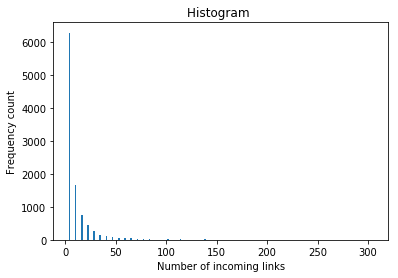

In [6]:
#draw histogram 
n_boxes1 = 50
freq_count, boxes = np.histogram(sites, bins= n_boxes1)
box_center = (boxes[:-1]+ boxes[1:])/2
plt.bar(box_center, freq_count, width=1.6)
plt.xlabel('Number of incoming links')
plt.ylabel('Frequency count')
plt.title('Histogram ')

Text(0.5, 1.0, 'Log-log plot of Percentage of Sites vs their in-degree')

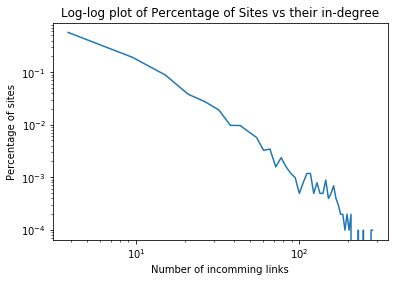

In [101]:
#draw log-log plot

percentage_of_sites = freq_count/(max_time + n)
plt.plot(box_center, percentage_of_sites)
plt.xlabel("Number of incomming links")
plt.ylabel('Percentage of sites')
plt.xscale("log")
plt.yscale('log')
plt.title('Log-log plot of Percentage of Sites vs their in-degree')


Text(0.5, 1.0, 'Log-log plot of Percentage of Sites vs their in-degree')

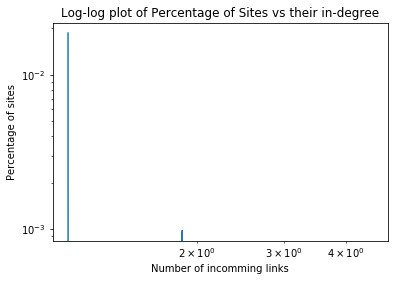

In [59]:
#draw log-log plot with log bins
 
bin_pos = np.logspace(np.log(1), np.log(sites.max()), 10)
freq_count2, boxes = np.histogram(sites, bins=bin_pos)
box_center2 = (boxes[:-1]+ boxes[1:])/2

percentage_of_sites = freq_count2/(max_time + n)
plt.plot(box_center2, percentage_of_sites)
plt.xlabel("Number of incomming links")
plt.ylabel('Percentage of sites')
plt.xscale("log")
plt.yscale('log')
plt.title('Log-log plot of Percentage of Sites vs their in-degree')


In [84]:
sites.max()

138

PART 2. Exercice.

In [58]:
#we re run the simulation at least 100 times
n = 100
p = 0.1
m=10
max_time = 10100 
#we track the number of links to each site. The site t has sites[t] links into it.
max_simulations= 100
sim_sites= np.ones((max_simulations, max_time), int)

for sim in range(max_simulations):
    for t in range(n, max_time):
        sim_sites[sim,:] = Link(sites, t, m,p)

np.save('100sim_sites_T_10100_p_01', sim_sites)

ValueError: could not broadcast input array from shape (200) into shape (10100)

In [6]:
sim_sites = np.load("100sim_sites_T_10100_p_01.npy")

In [47]:
n_boxes = 10

avg_sim = sim_sites.sum(axis=0)

freq, box_edges = np.histogram(avg_sim, bins= 20)


In [42]:
box_edges

array([1.   , 1.124, 1.248, 1.372, 1.496, 1.62 , 1.744, 1.868, 1.992,
       2.116, 2.24 , 2.364, 2.488, 2.612, 2.736, 2.86 , 2.984, 3.108,
       3.232, 3.356, 3.48 ])

<BarContainer object of 20 artists>

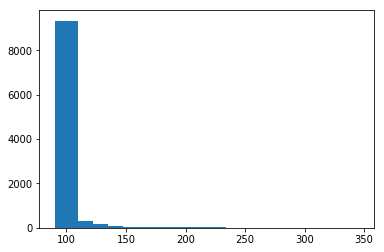

In [52]:
box_center = box_edges[:-1]/2 + box_edges[1:]/2
plt.bar(box_edges[:-1], freq, width=20)

In [ ]:
#ex 1. Start with n 100 sites just keep track of in degree of sites not which sites are linked to which.
#create and link function

# sites, t, m, p
def Link(sites, t, m, p):
    """
    Creates m links to previous sites [:t]. 
    """
    #probability of linking is proportional to links already on each site
    prob = sites[:t]/sites[:t].sum()
    for link in range(m):
        rand = np.random.rand()
        if rand < p:
            #choose at random
            linked_to = np.random.randint(0,t)
        else:
            #choose proportional to in degree of sites
            linked_to = np.random.choice(range(t), size = 1, p= prob)
        #increase by one the links of choosen site
        sites[linked_to] += 1

    return sites



Working with a matrix


In [81]:
#same model but now we tracl connections
n = 10
p = 0.5
m=5
max_time = 200

site_connection =np.diag(np.ones(max_time))

def LinkMatrix(sites, t, m, p):
    """
    Creates m links to previous sites [:t] and stores the links in matrix. 
    """
    #"create a new site " by linking 
    # probability is proportional to in degree
    in_degree = site_connection[:t,:t].sum(axis=1)
    prob = in_degree/sites[:t,:t].sum() 
    #^get max links from shape and m, maybe save the in degree so u dont have to recalculate

    for link in range(m):
        rand = np.random.rand()
        if(p < rand):
            #chose at random
            links_to = np.random.randint(0,t)
        else:
            links_to = np.random.choice(range(t), size = 1, p= prob)
        #set the apropiate  link to site
        site_connection[t,links_to] += 1
    return site_connection

    
        


In [ ]:
n = 5
p = 0.5
m=10
T = 10000
max_time = T+n
site_connection =np.diag(np.ones(max_time, int))
for t in range(n, max_time):
    site_connection= LinkMatrix(site_connection, t, m , p)
    
np.save("ex4_site_connections", site_connection)

In [60]:
a[:2,:2] 

array([[0.82998989, 0.96037879],
       [0.14620407, 0.93851732]])